## Getting data in the right format

In [1]:
import os

if os.path.exists('../data/ec_class_data.csv'):
    pass
else:
    with open("../data/ec_class_data.txt") as f:
        import ast
        text = f.read()
        list_of_ec_classes = ast.literal_eval(text)
        # Remove any elements that have alpha characters
        list_of_ec_classes = [x for x in list_of_ec_classes if not any(c.isalpha() for c in x)]
        with open("../data/ec_class_data.csv", "w") as f_prime:
            for x in list_of_ec_classes:
                f_prime.write(x + "\n")

In [2]:
import pandas as pd
from collections import defaultdict

ec_to_rheaid = defaultdict(list)

rhea_to_ec = pd.read_csv("../data/rhea2ec.tsv", sep="\t")

for index, row in rhea_to_ec.iterrows():
    ec_to_rheaid[row["ID"]].append(row["MASTER_ID"])

rhea_to_rc = pd.read_csv("../data/rhea2kegg_reaction.tsv", sep="\t")

rheaid_to_rc = defaultdict(list)

for index, row in rhea_to_rc.iterrows():
    rheaid_to_rc[row["MASTER_ID"]].append(row["ID"])

In [3]:
ec_to_rc = defaultdict(list)

for ec in ec_to_rheaid:
    for rheaid in ec_to_rheaid[ec]:
        for rc in rheaid_to_rc[rheaid]:
            ec_to_rc[ec].append(rc)

In [4]:
# write all RCs to a file
written_rcs = set()
with open("../data/all_rcs.txt", "w") as f:
    for ec in ec_to_rc:
        for rc in ec_to_rc[ec]:
            if rc not in written_rcs:
                written_rcs.add(rc)
                f.write(rc + "\n")

defaultdict(list,
            {'3.5.1.50': ['R02938'],
             '5.99.1.1': ['R04010'],
             '1.5.3.6': ['R07170'],
             '3.1.1.49': ['R02381'],
             '1.5.1.10': ['R02315'],
             '1.4.3.15': ['R00279', 'R00359'],
             '1.4.3.7': ['R00279'],
             '3.5.1.43': ['R04341'],
             '1.1.3.38': ['R02877'],
             '3.1.3.7': ['R00188'],
             '1.1.1.245': ['R02229'],
             '2.5.1.49': ['R00651', 'R01287'],
             '4.3.1.14': ['R03030'],
             '2.3.1.34': ['R02481'],
             '2.1.2.7': ['R01225'],
             '2.4.1.53': ['R12036'],
             '2.1.1.161': ['R07244'],
             '3.2.1.108': ['R01100'],
             '1.3.1.57': ['R05308'],
             '1.13.11.3': ['R01631'],
             '2.4.1.167': ['R00809'],
             '3.1.3.34': ['R02751'],
             '2.3.1.184': ['R08940'],
             '3.1.1.13': ['R02115', 'R01462'],
             '1.14.11.15': ['R03009'],
             '1.1.1.248

In [32]:
gh16 = []
with open("../data/gh16_ec.txt") as f:
    for line in f:
        gh16.append(line.strip())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(columns=["EC", "RClass"])
# insert ec_to_rc into df
for ec in ec_to_rc:
    for rc in ec_to_rc[ec]:
        df = df.append({"EC": ec, "RClass": rc}, ignore_index=True)

In [43]:
rc_count_df = df.groupby("RClass").count().reset_index()
# Get the top 10 most common RClasses alongside their counts
top_10_rc = rc_count_df.sort_values(by="EC", ascending=False).head(10)
top_10_rc

,RClass,EC,GH16
88,R00162,24,24
45,R00086,12,12
198,R00335,7,7
378,R00595,6,6
1614,R02584,5,5
3138,R05797,4,4
3489,R07234,4,4
3421,R07147,4,4
4453,R10000,3,3
4697,R10422,3,3


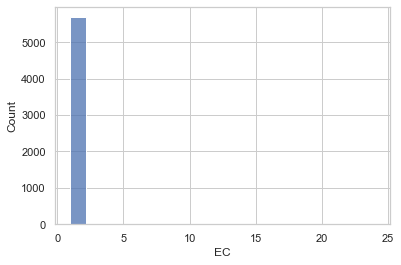

In [26]:
# Plot the distribution of the occurrence of each RClass


sns.set_theme(style="whitegrid")

ax = sns.histplot(data=rc_count_df, x="EC", bins=20)

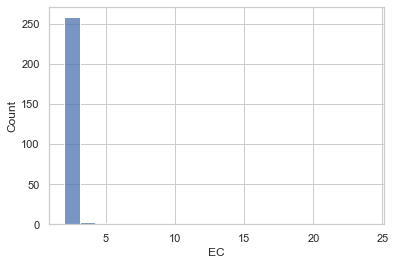

In [27]:
# filter out the RClasses that appear only once
rc_count_df_g_1 = rc_count_df[rc_count_df["EC"] > 1]
ax = sns.histplot(data=rc_count_df_g_1, x="EC", bins=20)

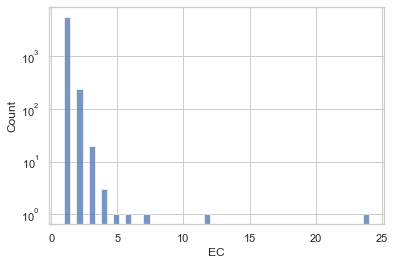

In [31]:
# Make the same plot but with log scale on the y-axis
ax = sns.histplot(data=rc_count_df, x="EC", bins=50, log_scale=(False, True))

In [33]:
def gh16_filter(x):
    return any([x.startswith(y) for y in gh16])

df["GH16"] = df["EC"].apply(gh16_filter)

,RClass,EC,GH16
42,R02120,2,2
74,R03116,2,2
153,R04636,2,2
173,R05901,2,2
175,R05909,2,2
176,R05912,2,2
177,R05915,2,2
183,R05931,2,2
263,R09295,2,2
264,R09296,2,2


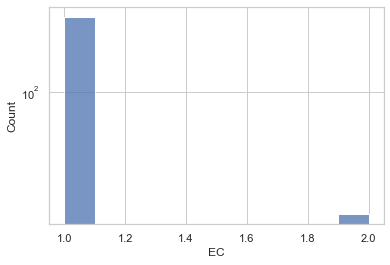

In [39]:
# GH_16
gh16_df = df[df["GH16"] == True]
gh16_rc_count_df = gh16_df.groupby("RClass").count().reset_index()
ax = sns.histplot(data=gh16_rc_count_df, x="EC", log_scale=(False, True))

# Get the RClass that has the most occurrences
gh16_rc_count_df[gh16_rc_count_df["EC"] == gh16_rc_count_df["EC"].max()]

In [47]:
# Check if an EC Class gets multiple RClasses and is a GH16
gh16_df.groupby("EC").count().reset_index().sort_values(by="RClass", ascending=False)
# Check number of EC in gh16_df that have more than one RClass
gh16_df.groupby("EC").count().reset_index().sort_values(by="RClass", ascending=False)["RClass"].value_counts()
# Get the ec that has the most RClasses
gh16_df.groupby("EC").count().reset_index().sort_values(by="RClass", ascending=False).head(1)

,EC,RClass,GH16
60,2.4.1.170,5,5


,EC,RClass,GH16
60,2.4.1.170,5,5
178,2.4.1.301,4,4
13,2.4.1.115,4,4
42,2.4.1.146,4,4
151,2.4.1.271,3,3
26,2.4.1.13,3,3
8,2.4.1.109,3,3
228,2.4.1.369,3,3
206,2.4.1.330,3,3
90,2.4.1.202,2,2


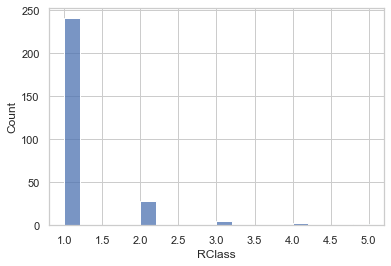

In [50]:
# Get all EC that start with 2.4.1
df_241 = df[df["EC"].str.startswith("2.4.1")].groupby("EC").count().reset_index().sort_values(by="RClass", ascending=False)

# Plot the distribution of the occurrence of each RClass for ECs that start with 2.4.1
ax = sns.histplot(data=df_241, x="RClass", bins=20)

# List top 10 RClasses for ECs that start with 2.4.1
df_241.head(10)

,EC,RClass,GH16
55,3.2.1.97,2,2
40,3.2.1.22,2,2
26,3.2.1.184,2,2
52,3.2.1.85,2,2
48,3.2.1.54,2,2
20,3.2.1.169,2,2
38,3.2.1.207,2,2
18,3.2.1.167,2,2
32,3.2.1.190,1,1
33,3.2.1.197,1,1


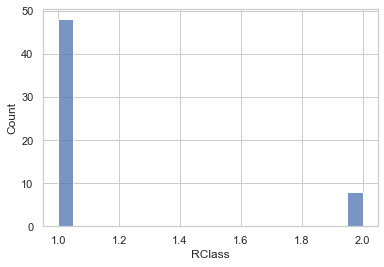

In [51]:
# Repeat analysis above but for EC 3.2.1 
df_321 = df[df["EC"].str.startswith("3.2.1")].groupby("EC").count().reset_index().sort_values(by="RClass", ascending=False)
ax = sns.histplot(data=df_321, x="RClass", bins=20)
df_321.head(10)